In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tf.__version__

'2.16.1'

In [12]:
image_dataset = tf.keras.utils.image_dataset_from_directory('C:/Datasets/archive/train', batch_size=1000, image_size=(128,128))

Found 13492 files belonging to 100 classes.


In [13]:
image_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
for data_batch, labels in image_dataset:
    X_train = data_batch
    y_train = labels


In [15]:
X_train = np.sum(X_train / 3, axis=3, keepdims=True)

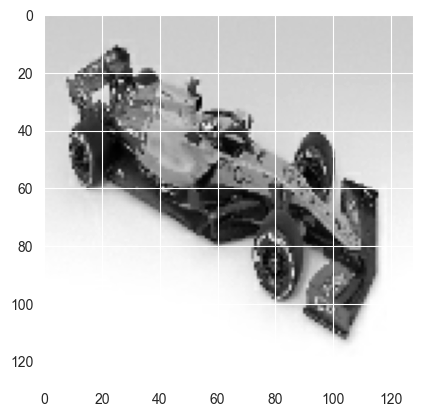

In [16]:
i = random.randint(0,20)
plt.imshow(X_train[i], cmap='gray')

In [38]:
X_train

array([[[[204.4896  ],
         [205.1146  ],
         [204.5677  ],
         ...,
         [190.6198  ],
         [189.125   ],
         [185.7552  ]],

        [[211.91669 ],
         [212.80728 ],
         [212.04166 ],
         ...,
         [189.54166 ],
         [180.28125 ],
         [172.7604  ]],

        [[215.74478 ],
         [216.41666 ],
         [216.41666 ],
         ...,
         [173.46353 ],
         [159.60938 ],
         [151.28645 ]],

        ...,

        [[120.8177  ],
         [121.24479 ],
         [120.296875],
         ...,
         [212.04166 ],
         [135.29688 ],
         [156.03125 ]],

        [[118.44792 ],
         [121.57292 ],
         [122.921875],
         ...,
         [125.41667 ],
         [141.82292 ],
         [153.04167 ]],

        [[120.375   ],
         [120.46875 ],
         [119.15625 ],
         ...,
         [ 87.03125 ],
         [ 80.322914],
         [ 26.546875]]],


       [[[201.51562 ],
         [203.82812 ],
         [204.

In [20]:
np.argm

41

In [26]:
y_train.shape

TensorShape([492])

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(492, activation='softmax'))

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9301 - loss: 0.3777
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9778 - loss: 0.1103
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9741 - loss: 0.1465
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9805 - loss: 0.1223
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9944 - loss: 0.0267
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9981 - loss: 0.0167
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9903 - loss: 0.0336
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9944 - loss: 0.0139
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9896 - loss: 0.0287
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9929 - loss: 0.0504
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9987 - loss: 0.0131
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - ac

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


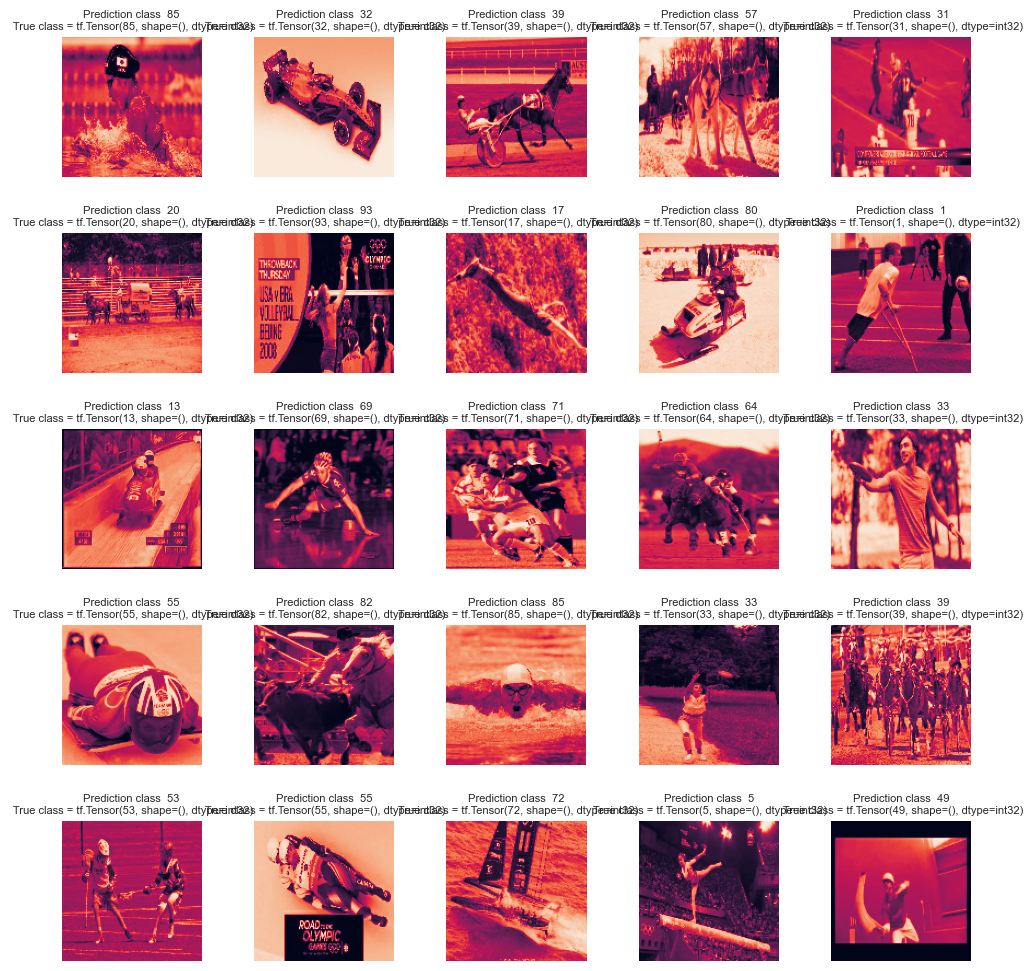

In [36]:
predicted_classes = np.argmax(model.predict(X_train), axis=1)
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    axes[i].imshow(X_train[i].reshape(128,128))
    axes[i].set_title("Prediction class  "+ str(predicted_classes[i]) +"\n True class = " + str(y_train[i]), fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)